# Midi Health
***

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import os

In [37]:
# Cargar los datos
file = os.path.abspath('../data/joinmidi_reviews.csv')
df = pd.read_csv(file)
df

,date,info by,author_name,author_location,type of review,title,rated,time_posted,paragraph,date_of_experience,reply_author,reply_date,reply_paragraph
0,2024-09-12 19:20:01,Info for Ann,Ann,US,Invited,Emily Stone was knowledgeable and…,5.0,2024-09-11T20:37:30.000Z,Emily Stone was knowledgeable and helpfulThe n...,"August 13, 2024",Reply from Midi Health,2024-09-12T14:49:51.000Z,Thank you for sharing your experience! We are ...
1,2024-09-12 19:20:01,Info for Laurel,Laurel,US,NaN,"Make it easy, make it smart",5.0,2024-09-11T20:03:46.000Z,Wow. My Midi practitioner listened without gas...,"September 08, 2024",NaN,NaN,NaN
2,2024-09-12 19:20:01,Info for Alicia Medina,Alicia Medina,US,Invited,Why didn't I do this sooner!!,5.0,2024-09-11T18:37:08.000Z,I could not be happier with my experience with...,"September 10, 2024",NaN,NaN,NaN
3,2024-09-12 19:20:02,Info for DMack,DMack,US,Invited,Midi - A lifesaver,5.0,2024-09-12T00:52:50.000Z,I had been struggling to find a local provider...,"September 09, 2024",Reply from Midi Health,2024-09-12T14:48:27.000Z,We are so happy you are finding the relief you...
4,2024-09-12 19:20:02,Info for tonia BARNES,tonia BARNES,US,NaN,Midi values and actively listens to you! They ...,5.0,2024-09-12T18:03:30.000Z,Brook was excellent! It was the first time I a...,"September 10, 2024",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2024-09-12 19:20:17,Info for Mommy of three,Mommy of three,US,NaN,I spoke with the doctor about my needs,5.0,2024-03-13T15:21:59.000Z,I spoke with the doctor about my needs. The do...,"March 01, 2024",NaN,NaN,NaN
265,2024-09-12 19:20:17,Info for M H,M H,US,NaN,Awful experience,2.0,2024-03-06T19:29:37.000Z,Awful experience. Switched to Midi Health with...,"February 23, 2024",Reply from Midi Health,2024-03-06T20:33:59.000Z,Hi! Thank you so much for your feedback. We're...
266,2024-09-12 19:20:17,Info for Nicole,Nicole,BE,NaN,Worst medical experience ever,1.0,2024-03-05T12:31:21.000Z,"Appt was with an NP, not MD and she provided n...","February 26, 2024",Reply from Midi Health,2024-03-06T14:28:34.000Z,"Hi Nicole,Thank you so much for your feedback...."
267,2024-09-12 19:20:17,Info for Sarah O,Sarah O,US,NaN,I had a brief initial consultation with…,1.0,2024-02-28T18:53:28.000Z,I had a brief initial consultation with a Midi...,"February 21, 2024",Reply from Midi Health,2024-02-28T20:47:30.000Z,"Hi Sarah,Thank you so much for your feedback. ..."


In [38]:
# Convertir columnas de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])
df['time_posted'] = pd.to_datetime(df['time_posted'])
# df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%d %B %Y') 
df['date_of_experience'] = pd.to_datetime(df['date_of_experience'], format='%B %d, %Y')

# Rellenar valores nulos
# df['paragraph'].fillna('', inplace=True)
# df['reply_paragraph'].fillna('', inplace=True)

# Normalizar datos
df['author_location'] = df['author_location'].str.upper()
df['rated'] = df['rated'].astype(float)

***

# Análisis de la distribución de ratings

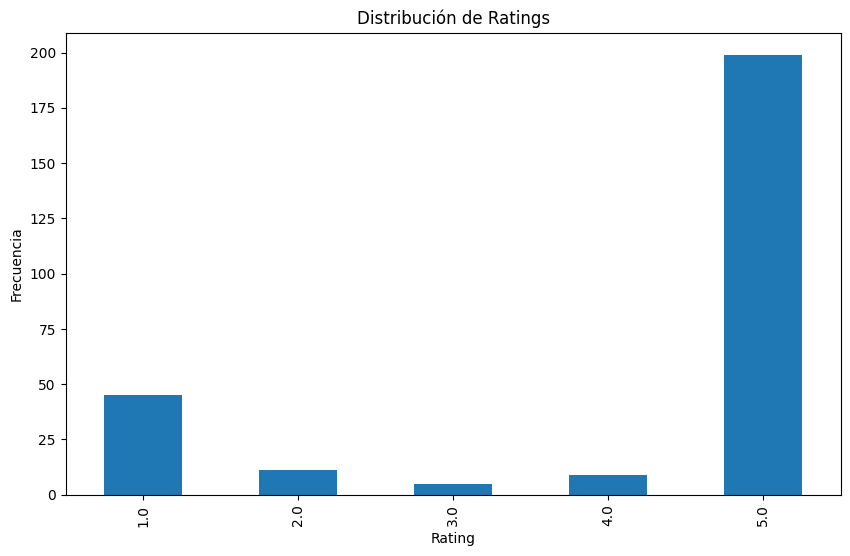

In [25]:
# Análisis de la distribución de ratings
plt.figure(figsize=(10, 6))
df['rated'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

# Análisis de frecuencia de palabras

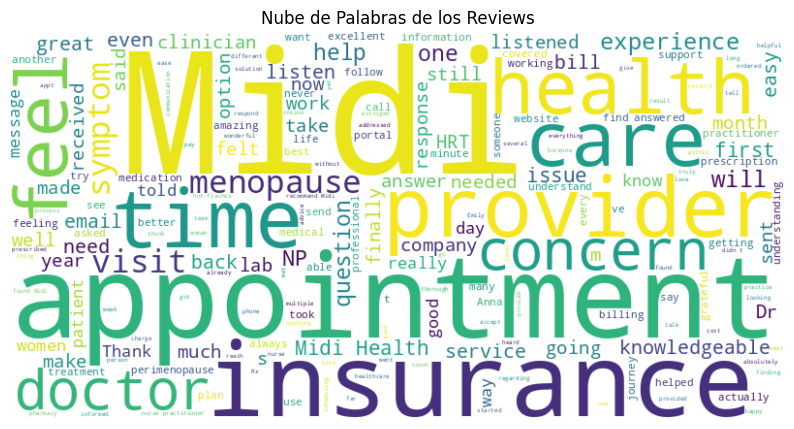

In [26]:
# Análisis de frecuencia de palabras
all_text = ' '.join(df['paragraph'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Reviews')
plt.show()
plt.close()

***

# Tendencias temporales

/tmp/ipykernel_160566/1813373493.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_ratings = df['rated'].resample('M').mean()


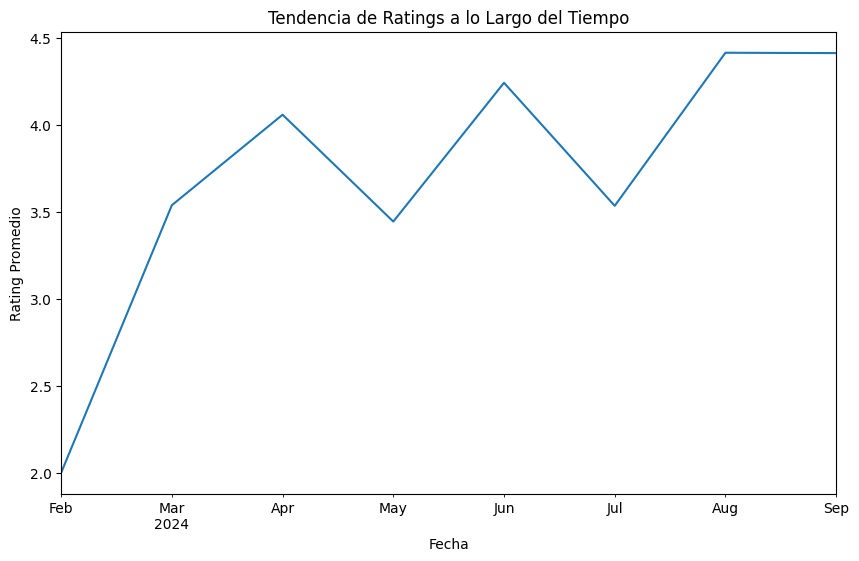

In [27]:
# Tendencias temporales
df.set_index('time_posted', inplace=True)
monthly_ratings = df['rated'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_ratings.plot(kind='line')
plt.title('Tendencia de Ratings a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Rating Promedio')
plt.show()
plt.close()

***

# Análisis de sentimientos

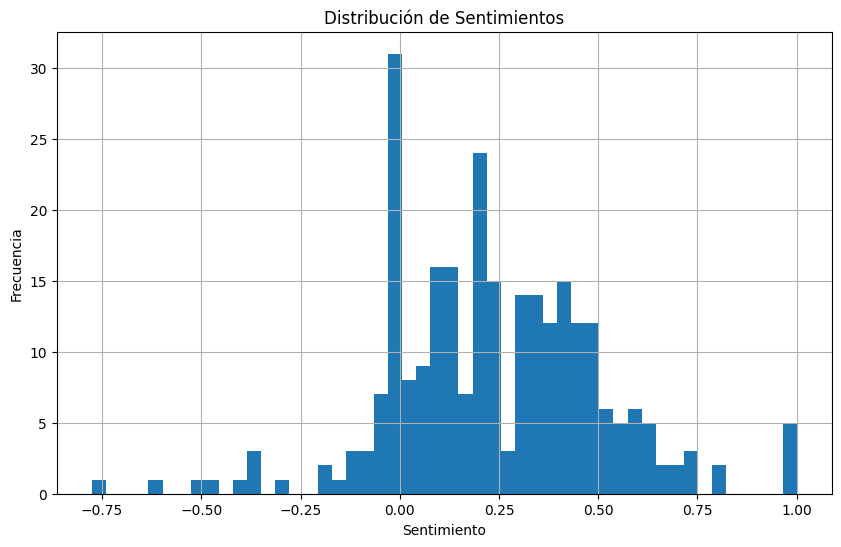

In [31]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=50)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

## Análisis de la Gráfica
***

### Eje X (Sentimiento):
La escala va de -1.0 a 1.0.
* -1.0 representa un sentimiento extremadamente negativo.
* 0.0 representa un sentimiento neutral.
* 1.0 representa un sentimiento extremadamente positivo.

### Eje Y (Frecuencia):
Muestra la cantidad de reviews que caen en cada rango de sentimiento.
La frecuencia varía desde 0 hasta más de 25.

### Observaciones
* **Concentración en 0.0**: La mayoría de los reviews tienen un sentimiento cercano a 0.0, indicando que muchos comentarios son neutrales.
* **Distribución**: Hay una menor cantidad de reviews con sentimientos extremadamente negativos (-1.0) y extremadamente positivos (1.0).
* **Tendencia General**: La distribución parece ser simétrica alrededor de 0.0, sugiriendo que los sentimientos están bastante equilibrados entre positivos y negativos.

### Interpretación
* **Neutralidad**: La alta concentración alrededor de 0.0 sugiere que muchos usuarios tienen opiniones neutrales sobre el servicio.
* **Polarización Baja**: La baja frecuencia en los extremos (-1.0 y 1.0) indica que pocos usuarios tienen opiniones extremadamente negativas o positivas.

### Siguientes Pasos

* Análisis Detallado: Investigar qué aspectos específicos del servicio generan sentimientos positivos o negativos.
* Segmentación: Analizar los sentimientos por diferentes segmentos, como fechas, tipos de reviews, o ubicaciones de los autores.

In [32]:
# Análisis de sentimientos
df['sentiment'] = df['paragraph'].fillna('', inplace=False).apply(lambda x: TextBlob(x).sentiment.polarity)

# Filtrar reviews positivos y negativos
positive_reviews = df[df['sentiment'] > 0]['paragraph']
negative_reviews = df[df['sentiment'] < 0]['paragraph']

# Generar nubes de palabras para reviews positivos y negativos
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

### Nube de Palabras de Reviews Positivos

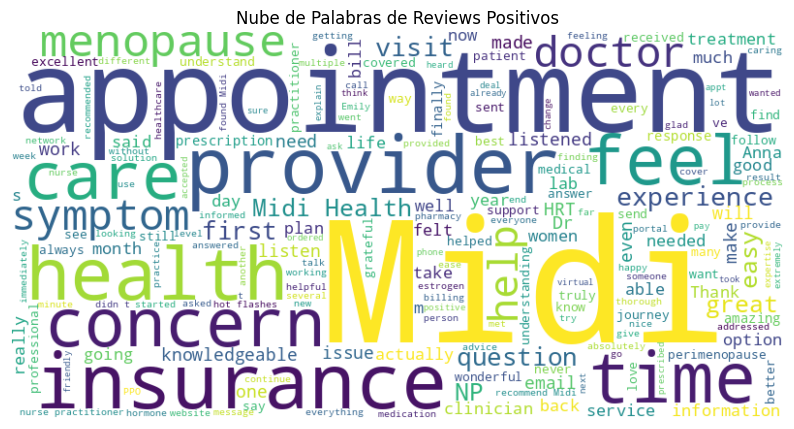

In [10]:
# Mostrar nubes de palabras
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Positivos')
plt.show()
plt.close()

### Nube de Palabras de Reviews Negativos

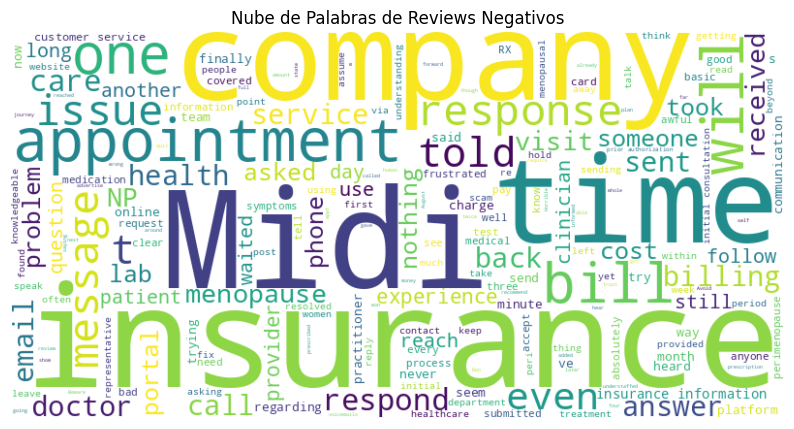

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reviews Negativos')
plt.show()
plt.close()

***

## Diferencia en Tiempo entre la Respuesta y el Comentario

In [39]:
df['reply_date'] = pd.to_datetime(df['reply_date'])

# Calcular la diferencia en días entre el comentario y la respuesta
df['response_time'] = (df['reply_date'] - df['time_posted']).dt.days #type: ignore

# Mostrar las primeras filas para verificar
df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
0,2024-09-11 20:37:30+00:00,2024-09-12 14:49:51+00:00,0.0
1,2024-09-11 20:03:46+00:00,NaT,NaN
2,2024-09-11 18:37:08+00:00,NaT,NaN
3,2024-09-12 00:52:50+00:00,2024-09-12 14:48:27+00:00,0.0
4,2024-09-12 18:03:30+00:00,NaT,NaN
...,...,...,...
264,2024-03-13 15:21:59+00:00,NaT,NaN
265,2024-03-06 19:29:37+00:00,2024-03-06 20:33:59+00:00,0.0
266,2024-03-05 12:31:21+00:00,2024-03-06 14:28:34+00:00,1.0
267,2024-02-28 18:53:28+00:00,2024-02-28 20:47:30+00:00,0.0


In [40]:
# Filtrar filas donde response_time es mayor a 0
filtered_df = df[df['response_time'] > 0]

# Visualizar las columnas deseadas
filtered_df[['time_posted', 'reply_date', 'response_time']]

,time_posted,reply_date,response_time
34,2024-08-30 18:02:32+00:00,2024-09-05 16:28:13+00:00,5.0
39,2024-08-17 17:52:55+00:00,2024-08-20 15:30:09+00:00,2.0
53,2024-08-13 17:59:53+00:00,2024-08-15 16:05:59+00:00,1.0
57,2024-08-12 23:30:09+00:00,2024-08-15 16:41:19+00:00,2.0
60,2024-08-12 17:50:27+00:00,2024-08-15 17:04:00+00:00,2.0
...,...,...,...
253,2024-04-10 19:49:10+00:00,2024-04-17 19:59:56+00:00,7.0
255,2024-03-26 17:15:37+00:00,2024-04-01 13:58:09+00:00,5.0
256,2024-03-23 16:04:02+00:00,2024-04-01 13:56:52+00:00,8.0
266,2024-03-05 12:31:21+00:00,2024-03-06 14:28:34+00:00,1.0


# Análisis de las Palabras Utilizadas en las Respuestas de la Clínica

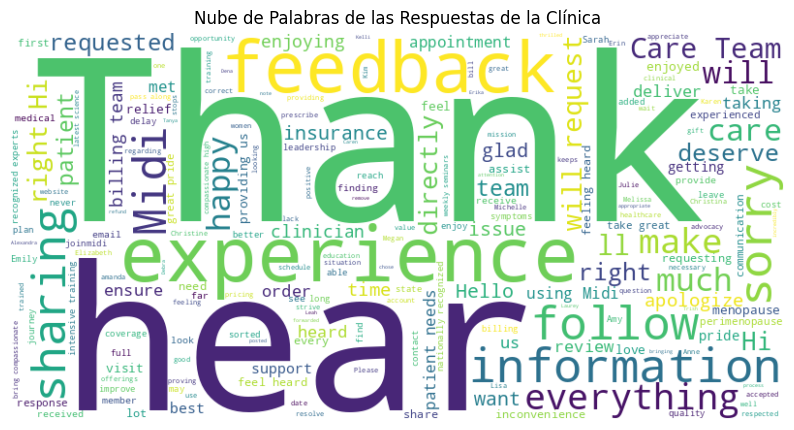

In [21]:
# Unir todos los textos de las respuestas
all_reply_text = ' '.join(df['reply_paragraph'].dropna())

# Generar la nube de palabras
reply_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reply_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(reply_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Respuestas de la Clínica')
plt.show()
plt.close()

# Insights Adicionales

Podemos obtener insights adicionales sobre la interacción entre clientes y la clínica, como la proporción de comentarios que reciben respuesta y el sentimiento de las respuestas.

Proporción de comentarios que reciben respuesta: 52.42%


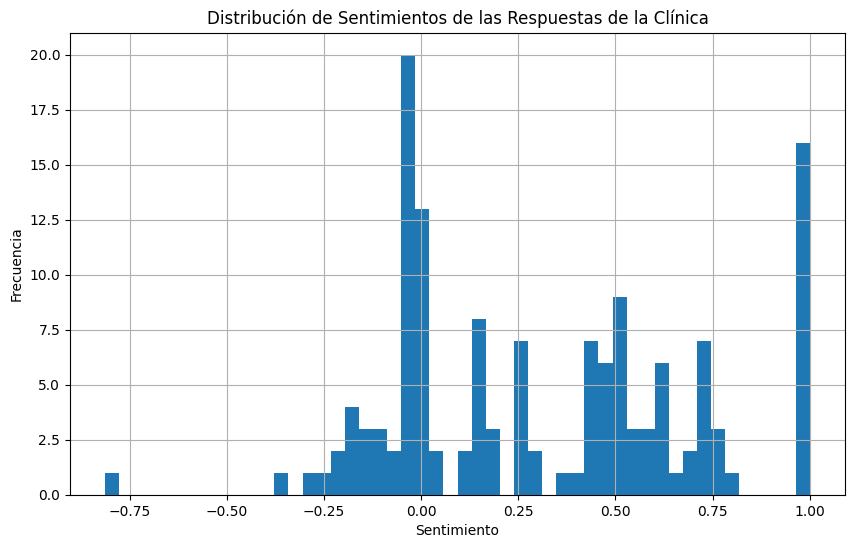

In [33]:
# Proporción de comentarios que reciben respuesta
response_rate = df['reply_paragraph'].notna().mean()
print(f"Proporción de comentarios que reciben respuesta: {response_rate:.2%}")

# Análisis de sentimientos de las respuestas
df['reply_sentiment'] = df['reply_paragraph'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None)

# Mostrar la distribución de sentimientos de las respuestas
plt.figure(figsize=(10, 6))
df['reply_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de las Respuestas de la Clínica')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

***

# Análisis de Títulos de Reviews

## Código para Análisis de Frecuencia de Palabras en los Títulos

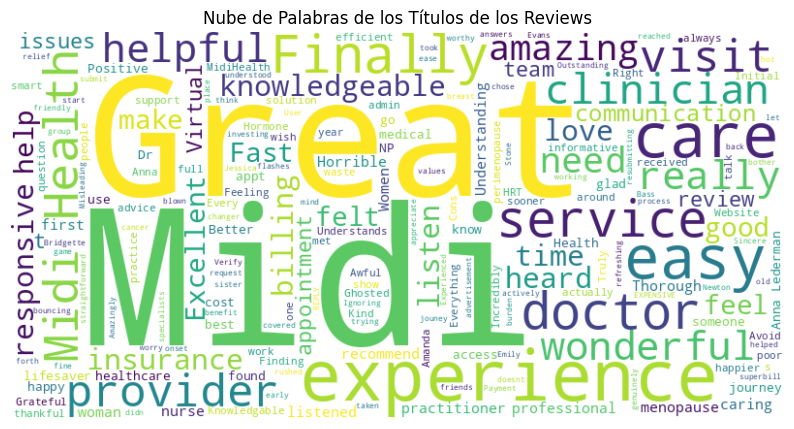

In [41]:
# Unir todos los títulos de los reviews
all_titles = ' '.join(df['title'].dropna())

# Generar la nube de palabras
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de los Reviews')
plt.show()
plt.close()

## Relación entre el Título y el Sentimiento

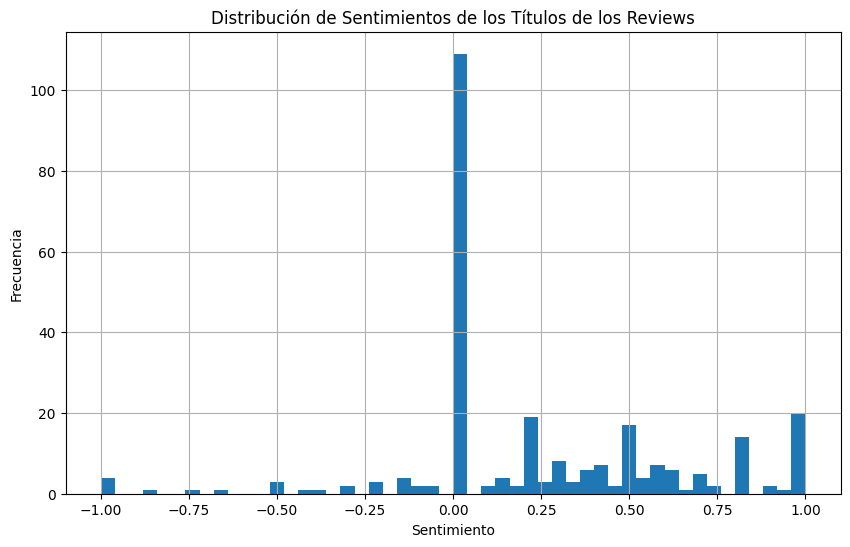

In [42]:
# Calcular el sentimiento de los títulos
df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notna(x) else None)

# Mostrar la distribución de sentimientos de los títulos
plt.figure(figsize=(10, 6))
df['title_sentiment'].dropna().hist(bins=50)
plt.title('Distribución de Sentimientos de los Títulos de los Reviews')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()
plt.close()

### Análisis del Gráfico (por Copilot)

El gráfico muestra la **Distribución de Sentimientos de los Títulos de los Reviews**. Aquí hay algunos puntos clave que podemos observar:

1. **Eje X (Sentimiento)**:
    
    - La escala va de **-1.00 a 1.00**.
    - **-1.00** representa un sentimiento extremadamente negativo.
    - **0.00** representa un sentimiento neutral.
    - **1.00** representa un sentimiento extremadamente positivo.
2. **Eje Y (Frecuencia)**:
    
    - Muestra la cantidad de títulos de reviews que caen en cada rango de sentimiento.
    - La frecuencia varía desde **0 hasta más de 100**.

### Observaciones

- **Concentración en 0.00**: La mayoría de los títulos tienen un sentimiento cercano a **0.00**, indicando que muchos títulos son neutrales.
- **Distribución**: Hay una menor cantidad de títulos con sentimientos extremadamente negativos (-1.00) y extremadamente positivos (1.00).
- **Tendencia General**: La distribución parece ser simétrica alrededor de 0.00, sugiriendo que los sentimientos están bastante equilibrados entre positivos y negativos.